In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from NN.ann import ann

/tmp/ipykernel_451173/3878865616.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Import data

Let us import the dataset and perform some simple exploratory analysis

In [2]:
dataset = pd.read_csv("examples/houseprices/train.csv")
dataset.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
dataset = dataset.drop('Id', axis=1)
dataset.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


<Figure size 900x800 with 0 Axes>

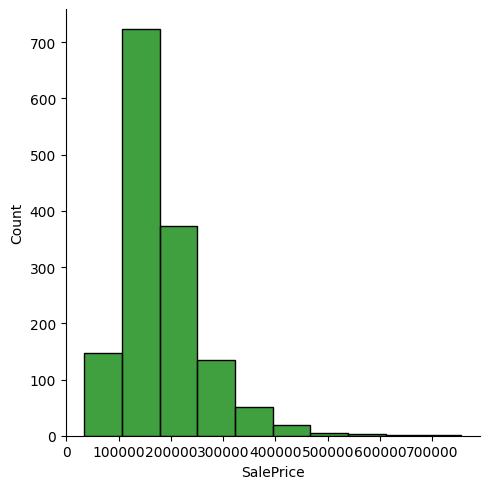

In [4]:
plt.figure(figsize=(9, 8))
sns.displot(dataset['SalePrice'], color='g', bins=10)

In [5]:
dataset_num = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_num.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


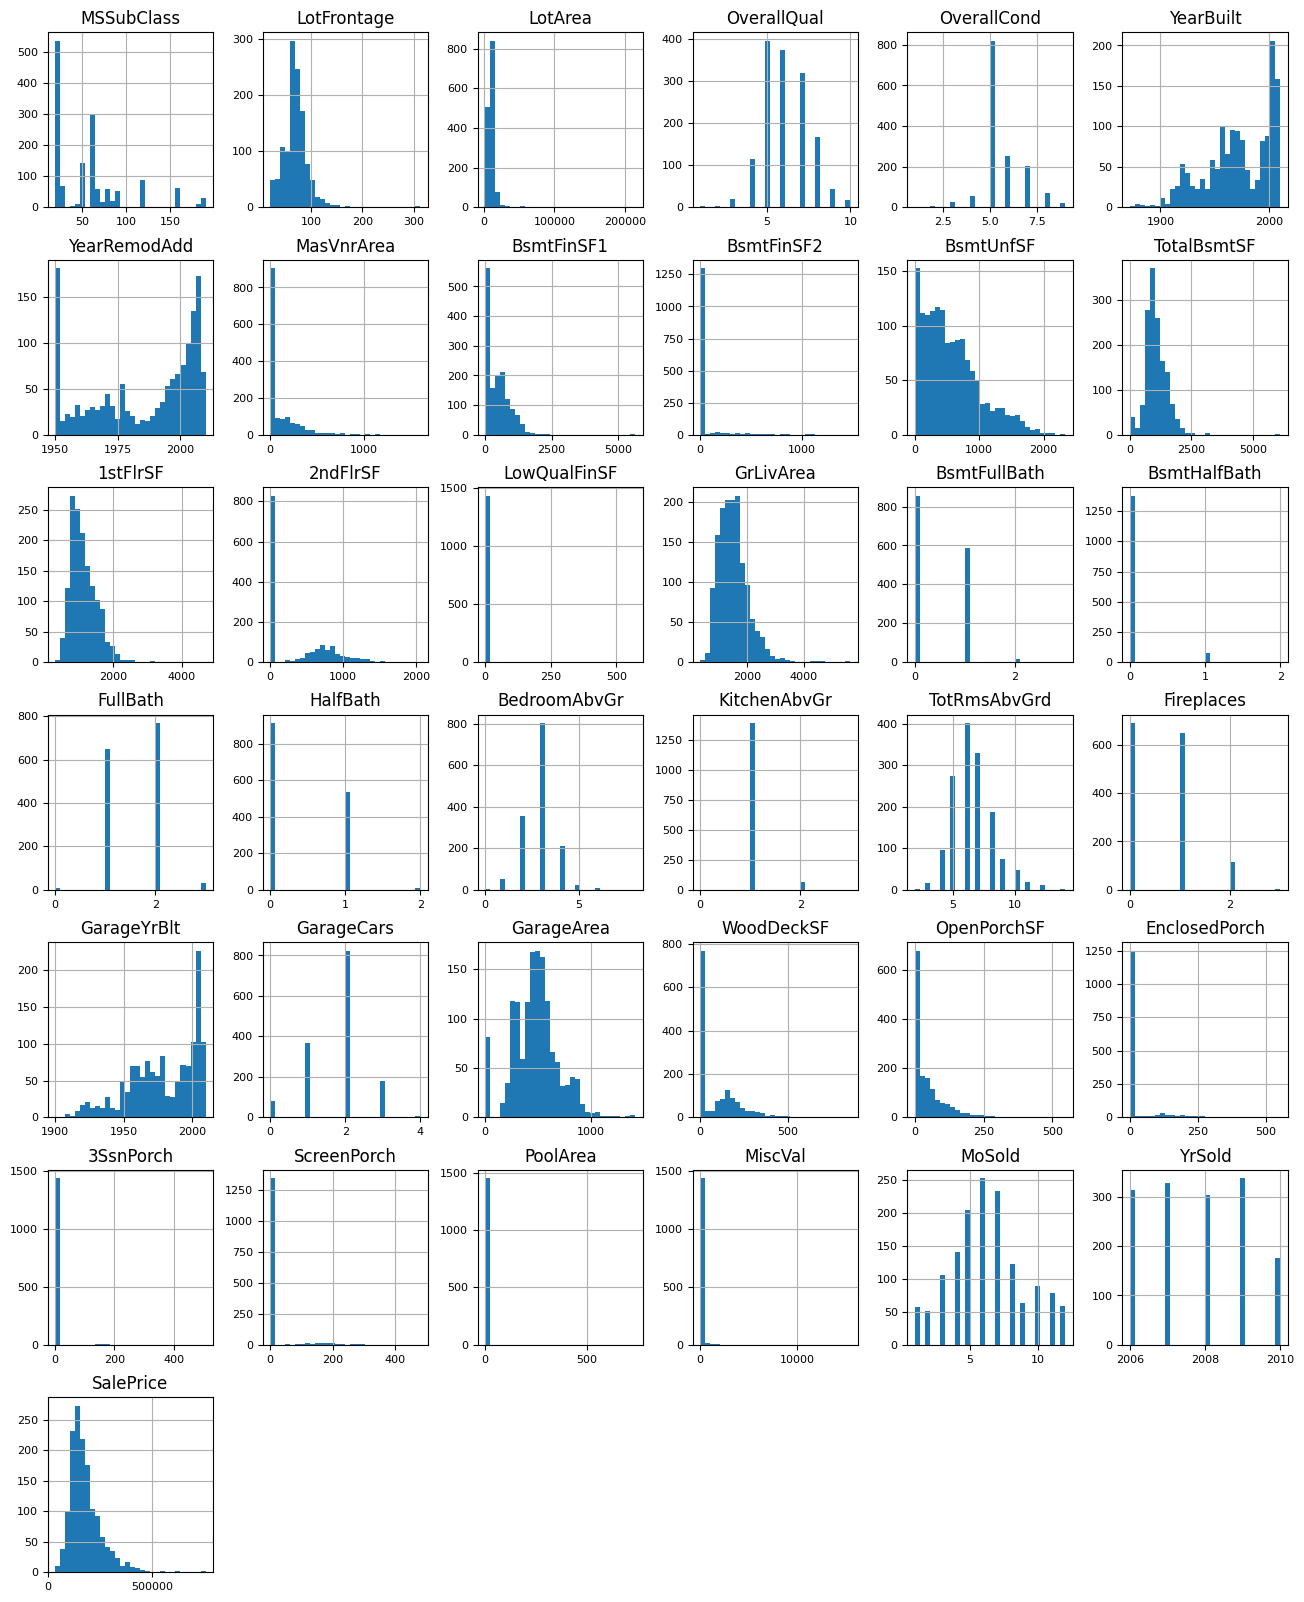

In [6]:
dataset_num.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8);

#### Replace NA's

Typically, the datasets aren't complete. Hence, we must replace all np.nan-values with some number. Typical choices are "-1" or "mean", unless better alternatives are available

In [ ]:
dataset_num.columns[dataset_num.isna().any()].tolist()

In [8]:
dataset_num.fillna(-1,inplace=True)

### Transform dataset and make ready for training

Let us split the dataset into a training and a validation part. Furthermore, let us rescale all variables.

In [9]:
def split_dataset(dataset, val_pct = 0.30):
    # split the dataset into two parts; train and validation
    val_indices = np.random.rand(len(dataset)) < val_pct

    return dataset[~val_indices], dataset[val_indices]

In [51]:
train_ds_pd, valid_ds_pd = split_dataset(dataset_num)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1002 examples in training, 458 examples in testing.


In [52]:
label = 'SalePrice'

X_train_pd = train_ds_pd.drop(label, axis=1)
y_train_pd = train_ds_pd[label]

X_valid_pd = valid_ds_pd.drop(label, axis=1)
y_valid_pd = valid_ds_pd[label]

In [53]:
X_train = X_train_pd.to_numpy()
y_train = y_train_pd.to_numpy()

X_valid = X_valid_pd.to_numpy()
y_valid = y_valid_pd.to_numpy()

In [54]:
input_scaler = preprocessing.StandardScaler()
X_train_s = input_scaler.fit_transform(X_train).T
X_valid_s = input_scaler.transform(X_valid).T

output_scaler = preprocessing.StandardScaler()
y_train_s = output_scaler.fit_transform(y_train.reshape(len(y_train),1))
y_valid_s = output_scaler.transform(y_valid.reshape(len(y_valid),1))

### Train the model on the data

In [61]:
myANN = ann([16, 16])
myANN.build(num_input_features = X_train.shape[1])

In [62]:
myANN.fit(X_train_s, y_train_s, X_val=X_valid_s, Y_val=y_valid_s, optimizer='gradientDescent', beta=0.9, epochs=10000, learning_rate = 1e-4)

Epoch:   0  |  Training Cost: 48548.596772   |   Validation Cost: 73516.339832
Epoch: 100  |  Training Cost: 1.464419   |   Validation Cost: 1.575841
Epoch: 200  |  Training Cost: 1.362205   |   Validation Cost: 1.457516
Epoch: 300  |  Training Cost: 1.276225   |   Validation Cost: 1.358562
Epoch: 400  |  Training Cost: 1.203024   |   Validation Cost: 1.274847
Epoch: 500  |  Training Cost: 1.140026   |   Validation Cost: 1.203261
Epoch: 600  |  Training Cost: 1.085269   |   Validation Cost: 1.141458
Epoch: 700  |  Training Cost: 1.037252   |   Validation Cost: 1.087637
Epoch: 800  |  Training Cost: 0.994804   |   Validation Cost: 1.040395
Epoch: 900  |  Training Cost: 0.957008   |   Validation Cost: 0.998625
Epoch: 1000  |  Training Cost: 0.923128   |   Validation Cost: 0.961443
Epoch: 1100  |  Training Cost: 0.892570   |   Validation Cost: 0.928137
Epoch: 1200  |  Training Cost: 0.864855   |   Validation Cost: 0.898131
Epoch: 1300  |  Training Cost: 0.839587   |   Validation Cost: 0.8